In [94]:
from math import floor, ceil, log, sqrt
import numpy as np
import numpy.random as npr
import numpy.linalg as npla
import scipy as sp
import scipy.linalg as spla
import matplotlib.pyplot as plt
%matplotlib inline

import ihs

In [77]:
reload(ihs)

<module 'ihs' from 'ihs.py'>

In [2]:
n = 50000
p = 100
A = npr.normal(size=(n, p))
y = npr.normal(size=n)

In [3]:
x_ols = ihs.ols(y, A)

In [19]:
x_cs = ihs.classical_sketch(y, A, 24 * p, sketch_type="subsample")

In [20]:
x_hs = ihs.hessian_sketch(y, A, 24 * p, sketch_type="subsample")

In [21]:
x_ihs = ihs.iterative_hessian_sketch(y, A, 6 * p, 4, sketch_type="subsample")

In [26]:
print ihs.pred_error(x_ols, x_cs, A)
print ihs.pred_error(x_ols, x_hs, A)
print ihs.pred_error(x_ols, x_ihs, A)

print ihs.mse_error(x_ols, x_cs)
print ihs.mse_error(x_ols, x_hs)
print ihs.mse_error(x_ols, x_ihs)

0.21330115631314875
0.009185198694858043
0.004746985170568139
0.02144370589084009
0.0009218495113455377
0.00047783301082874317


## Choices of sketch matrices
We compute the iterative Hessian sketch result using Gaussian, subsample, random unitary matrix as the sketching matrix respectively, and compare their performances.

In [79]:
def vary_sketch_mat(A, y, N_arr, m):
    x_ols = ihs.ols(y, A)
    N = len(N_arr)
    x_gaussian_err = np.empty(N)
    x_exponent_err = np.empty(N)
    x_subsample_err = np.empty(N)
    x_orthogonal_err = np.empty(N)
    for i in range(len(N_arr)):
        x_gaussian_err[i] = ihs.pred_error(ihs.iterative_hessian_sketch(y, A, m, N_arr[i], sketch_type="gaussian"), x_ols, A)
        x_exponent_err[i] = ihs.pred_error(ihs.iterative_hessian_sketch(y, A, m, N_arr[i], sketch_type="exponential"), x_ols, A)
        x_subsample_err[i] = ihs.pred_error(ihs.iterative_hessian_sketch(y, A, m, N_arr[i], sketch_type="subsample"), x_ols, A)
        x_orthogonal_err[i] = ihs.pred_error(ihs.iterative_hessian_sketch(y, A, m, N_arr[i], sketch_type="orthogonal"), x_ols, A)
    return x_gaussian_err, x_exponent_err, x_subsample_err, x_orthogonal_err


In [102]:
npr.seed(124)
n = 500
p = 30
R = 20
N_arr = np.array([5, 6, 8, 10, 20, 30])
m = 6 * p
gauss_err1 = np.empty((R, len(N_arr)))
expon_err1 = np.empty((R, len(N_arr)))
subsam_err1 = np.empty((R, len(N_arr)))
orthog_err1 = np.empty((R, len(N_arr)))

for i in range(R):
    A = npr.normal(size=(n, p))
    x0 = npr.normal(size=p)
    w = npr.normal(size=n) * 1.0
    y = np.dot(A, x0) + w

    gauss_err1[i, :], expon_err1[i, :], subsam_err1[i, :], orthog_err1[i, :] = vary_sketch_mat(A, y, N_arr, m)

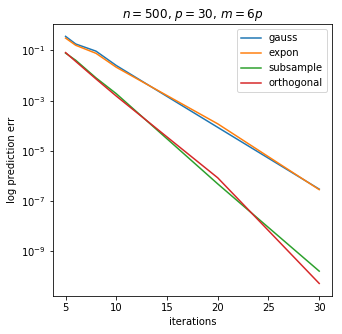

In [103]:
fg = plt.figure(figsize=(5, 5))
ax = fg.add_subplot(1, 1, 1)
gauss_mean = ax.plot(N_arr, gauss_err1.mean(axis=0), label="gauss")
expon_mean = ax.plot(N_arr, expon_err1.mean(axis=0), label="expon")
subsam_mean = ax.plot(N_arr, subsam_err1.mean(axis=0), label="subsample")
orthog_mean = ax.plot(N_arr, orthog_err1.mean(axis=0), label="orthogonal")
# gauss = ax.errorbar(N_arr, gauss_err1.mean(axis=0), yerr=gauss_err1.std(axis=0), label="gauss")
# subsam = ax.errorbar(N_arr, subsam_err1.mean(axis=0), yerr=subsam_err1.std(axis=0), label="subsample")
# orthog = ax.errorbar(N_arr, orthog_err1.mean(axis=0), yerr=orthog_err1.std(axis=0), label="orthogonal")

ax.set_xlabel("iterations")
ax.set_ylabel("log prediction err")
ax.set_title(r"$n={n}$, $p={p}$, $m={mdp}p$".format(n=n, p=p, mdp=m/p))
ax.set_yscale("log")
ax.legend(loc="best")
plt.savefig("../fig/diff_sketch_mat_err_vs_iter_n{n}_p{p}_m{m}.pdf".format(n=n, p=p, m=m), bbox_inches="tight")

## Model misspecification
In previous simulations, we used Gaussian design and linear model as the ground truth. What if the model is misspecified? In this section, we will consider model real-world cases, where the model is misspecified.

### 1. Designs with larger tails

In [100]:
# exponential design
npr.seed(124)
n = 500
p = 30
R = 20
N_arr = np.array([5, 6, 8, 10, 20, 30])
m = 6 * p
gauss_err1 = np.empty((R, len(N_arr)))
expon_err1 = np.empty((R, len(N_arr)))
subsam_err1 = np.empty((R, len(N_arr)))
orthog_err1 = np.empty((R, len(N_arr)))

for i in range(R):
    A = npr.laplace(scale=sqrt(0.5), size=(n, p))
    x0 = npr.normal(size=p)
    w = npr.normal(size=n) * 1.0
    y = np.dot(A, x0) + w

    gauss_err1[i, :], expon_err1[i, :], subsam_err1[i, :], orthog_err1[i, :] = vary_sketch_mat(A, y, N_arr, m)

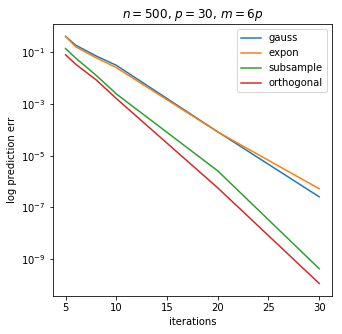

In [101]:
fg = plt.figure(figsize=(5, 5))
ax = fg.add_subplot(1, 1, 1)
gauss_mean = ax.plot(N_arr, gauss_err1.mean(axis=0), label="gauss")
expon_mean = ax.plot(N_arr, expon_err1.mean(axis=0), label="expon")
subsam_mean = ax.plot(N_arr, subsam_err1.mean(axis=0), label="subsample")
orthog_mean = ax.plot(N_arr, orthog_err1.mean(axis=0), label="orthogonal")

ax.set_xlabel("iterations")
ax.set_ylabel("log prediction err")
ax.set_title(r"$n={n}$, $p={p}$, $m={mdp}p$".format(n=n, p=p, mdp=m/p))
ax.set_yscale("log")
ax.legend(loc="best")
plt.savefig("../fig/exp_design_err_vs_iter_n{n}_p{p}_m{m}.pdf".format(n=n, p=p, m=m), bbox_inches="tight")

In [114]:
# cauchy design
npr.seed(124)
n = 500
p = 30
R = 20
N_arr = np.array([5, 6, 8, 10, 20, 30])
m = 6 * p
gauss_err1 = np.empty((R, len(N_arr)))
expon_err1 = np.empty((R, len(N_arr)))
subsam_err1 = np.empty((R, len(N_arr)))
orthog_err1 = np.empty((R, len(N_arr)))

for i in range(R):
    A = npr.standard_cauchy(size=(n, p))
    x0 = npr.normal(size=p)
    w = npr.normal(size=n) * 1.0
    y = np.dot(A, x0) + w

    gauss_err1[i, :], expon_err1[i, :], subsam_err1[i, :], orthog_err1[i, :] = vary_sketch_mat(A, y, N_arr, m)

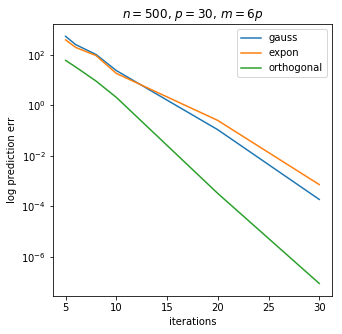

In [115]:
# subsample methods blow-up
fg = plt.figure(figsize=(5, 5))
ax = fg.add_subplot(1, 1, 1)
gauss_mean = ax.plot(N_arr, gauss_err1.mean(axis=0), label="gauss")
expon_mean = ax.plot(N_arr, expon_err1.mean(axis=0), label="expon")
# subsam_mean = ax.plot(N_arr, subsam_err1.mean(axis=0), label="subsample")
orthog_mean = ax.plot(N_arr, orthog_err1.mean(axis=0), label="orthogonal")

ax.set_xlabel("iterations")
ax.set_ylabel("log prediction err")
ax.set_title(r"$n={n}$, $p={p}$, $m={mdp}p$".format(n=n, p=p, mdp=m/p))
ax.set_yscale("log")
ax.legend(loc="best")
plt.savefig("../fig/cauchy_design_err_vs_iter_n{n}_p{p}_m{m}.pdf".format(n=n, p=p, m=m), bbox_inches="tight")

### 2. Nonlinear models

In [127]:
# sin transformation, highly nonlinear
npr.seed(124)
n = 500
p = 30
R = 20
N_arr = np.array([5, 6, 8, 10, 20, 30])
m = 6 * p
gauss_err1 = np.empty((R, len(N_arr)))
expon_err1 = np.empty((R, len(N_arr)))
subsam_err1 = np.empty((R, len(N_arr)))
orthog_err1 = np.empty((R, len(N_arr)))

for i in range(R):
    A = npr.normal(size=(n, p))
    x0 = npr.normal(size=p)
    w = npr.normal(size=n) * 1.0
    y = np.sin(np.dot(A, x0)) + w

    gauss_err1[i, :], expon_err1[i, :], subsam_err1[i, :], orthog_err1[i, :] = vary_sketch_mat(A, y, N_arr, m)

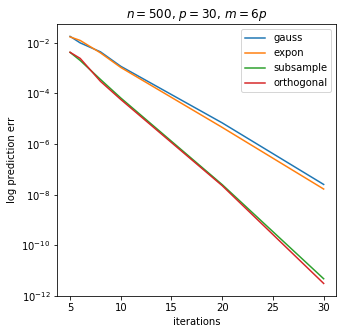

In [128]:
fg = plt.figure(figsize=(5, 5))
ax = fg.add_subplot(1, 1, 1)
gauss_mean = ax.plot(N_arr, gauss_err1.mean(axis=0), label="gauss")
expon_mean = ax.plot(N_arr, expon_err1.mean(axis=0), label="expon")
subsam_mean = ax.plot(N_arr, subsam_err1.mean(axis=0), label="subsample")
orthog_mean = ax.plot(N_arr, orthog_err1.mean(axis=0), label="orthogonal")

ax.set_xlabel("iterations")
ax.set_ylabel("log prediction err")
ax.set_title(r"$n={n}$, $p={p}$, $m={mdp}p$".format(n=n, p=p, mdp=m/p))
ax.set_yscale("log")
ax.legend(loc="best")
plt.savefig("../fig/sin_transform_err_vs_iter_n{n}_p{p}_m{m}.pdf".format(n=n, p=p, m=m), bbox_inches="tight")

In [131]:
# cubic transformation, highly nonlinear
npr.seed(124)
n = 500
p = 30
R = 20
N_arr = np.array([5, 6, 8, 10, 20, 30])
m = 6 * p
gauss_err1 = np.empty((R, len(N_arr)))
expon_err1 = np.empty((R, len(N_arr)))
subsam_err1 = np.empty((R, len(N_arr)))
orthog_err1 = np.empty((R, len(N_arr)))

for i in range(R):
    A = npr.normal(size=(n, p))
    x0 = npr.normal(size=p)
    w = npr.normal(size=n) * 1.0
    y = np.dot(A, x0) ** 3 + w

    gauss_err1[i, :], expon_err1[i, :], subsam_err1[i, :], orthog_err1[i, :] = vary_sketch_mat(A, y, N_arr, m)

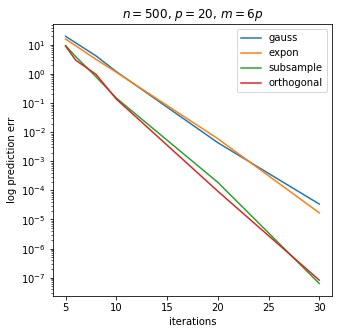

In [130]:
fg = plt.figure(figsize=(5, 5))
ax = fg.add_subplot(1, 1, 1)
gauss_mean = ax.plot(N_arr, gauss_err1.mean(axis=0), label="gauss")
expon_mean = ax.plot(N_arr, expon_err1.mean(axis=0), label="expon")
subsam_mean = ax.plot(N_arr, subsam_err1.mean(axis=0), label="subsample")
orthog_mean = ax.plot(N_arr, orthog_err1.mean(axis=0), label="orthogonal")

ax.set_xlabel("iterations")
ax.set_ylabel("log prediction err")
ax.set_title(r"$n={n}$, $p={p}$, $m={mdp}p$".format(n=n, p=p, mdp=m/p))
ax.set_yscale("log")
ax.legend(loc="best")
plt.savefig("../fig/cubic_transform_err_vs_iter_n{n}_p{p}_m{m}.pdf".format(n=n, p=p, m=m), bbox_inches="tight")

### 3. Noisy system
In this part, we will consider a noisier system.

In [146]:
# noise std = 2.0
npr.seed(124)
n = 500
p = 30
R = 20
N_arr = np.array([5, 6, 8, 10, 20, 30])
m = 6 * p
gauss_err1 = np.empty((R, len(N_arr)))
expon_err1 = np.empty((R, len(N_arr)))
subsam_err1 = np.empty((R, len(N_arr)))
orthog_err1 = np.empty((R, len(N_arr)))

for i in range(R):
    A = npr.normal(size=(n, p))
    x0 = npr.normal(size=p)
    w = npr.normal(size=n) * 5.0
    y = np.dot(A, x0) + w

    gauss_err1[i, :], expon_err1[i, :], subsam_err1[i, :], orthog_err1[i, :] = vary_sketch_mat(A, y, N_arr, m)

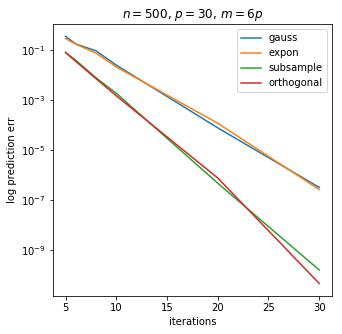

In [147]:
fg = plt.figure(figsize=(5, 5))
ax = fg.add_subplot(1, 1, 1)
gauss_mean = ax.plot(N_arr, gauss_err1.mean(axis=0), label="gauss")
expon_mean = ax.plot(N_arr, expon_err1.mean(axis=0), label="expon")
subsam_mean = ax.plot(N_arr, subsam_err1.mean(axis=0), label="subsample")
orthog_mean = ax.plot(N_arr, orthog_err1.mean(axis=0), label="orthogonal")

ax.set_xlabel("iterations")
ax.set_ylabel("log prediction err")
ax.set_title(r"$n={n}$, $p={p}$, $m={mdp}p$".format(n=n, p=p, mdp=m/p))
ax.set_yscale("log")
ax.legend(loc="best")
plt.savefig("../fig/noisy5_err_vs_iter_n{n}_p{p}_m{m}.pdf".format(n=n, p=p, m=m), bbox_inches="tight")